<a href="https://colab.research.google.com/github/niharikabulani/DAV-LAB/blob/main/dav_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment - 3: Multiple Linear Regression in Python and **R** **bold text**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
dataset = pd.read_csv('car.csv')
dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<ipython-input-6-1557ffddec14>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


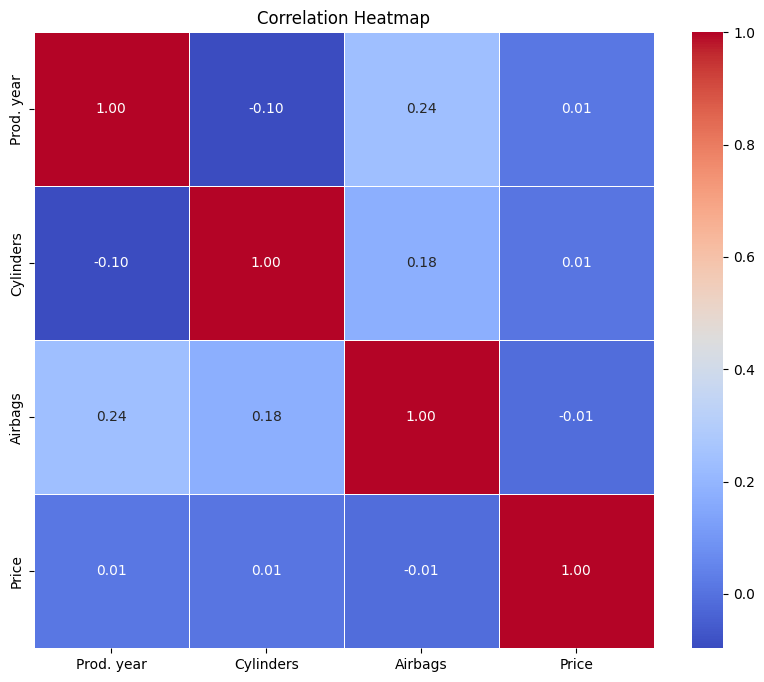

In [ ]:
X_columns = ['Prod. year', 'Cylinders', 'Airbags', 'Engine volume', 'Mileage']

y_column = 'Price'

selected_columns = X_columns + [y_column]
selected_data = dataset[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(dataset.dtypes)

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object


In [ ]:
dataset = dataset.drop(['Levy','Manufacturer','Model','Category','Leather interior','Fuel type','Engine volume','Mileage','Cylinders','Gear box type','Drive wheels','Doors','Wheel','Color'], axis = 1)

In [ ]:
dataset.head()


,ID,Price,Prod. year,Airbags
0,45654403,13328,2010,12
1,44731507,16621,2011,8
2,45774419,8467,2006,2
3,45769185,3607,2011,0
4,45809263,11726,2014,4


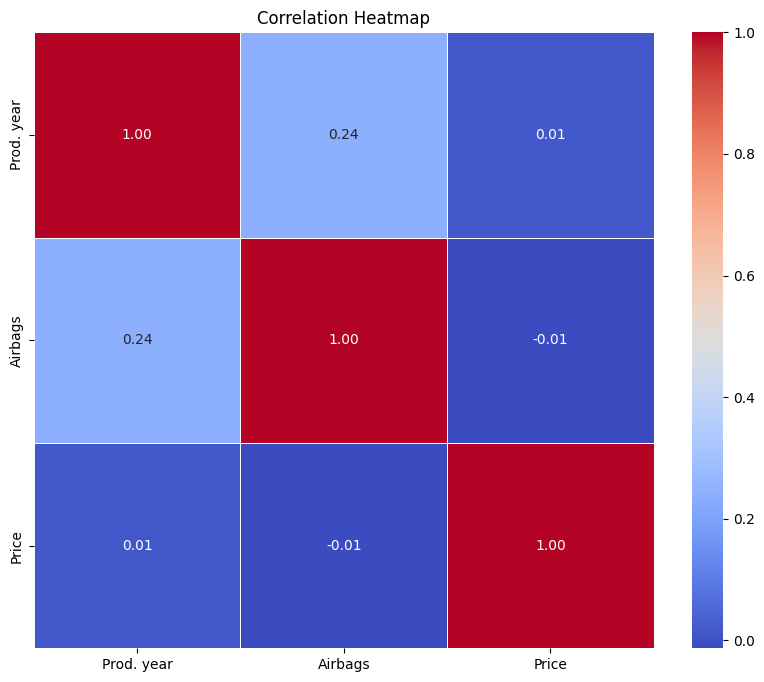

In [ ]:
X_columns = ['Prod. year','Airbags']
y_column = 'Price'


selected_columns = X_columns + [y_column]
selected_data = dataset[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
X_columns = dataset.columns[1:]
y_column = dataset.columns[0]
print(" X:")
print(X_columns)

print("\ny:")
print(y_column)

 X:
Index(['Price', 'Prod. year', 'Airbags'], dtype='object')

y:
ID


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

752824043462.2811
0.00338781318499104


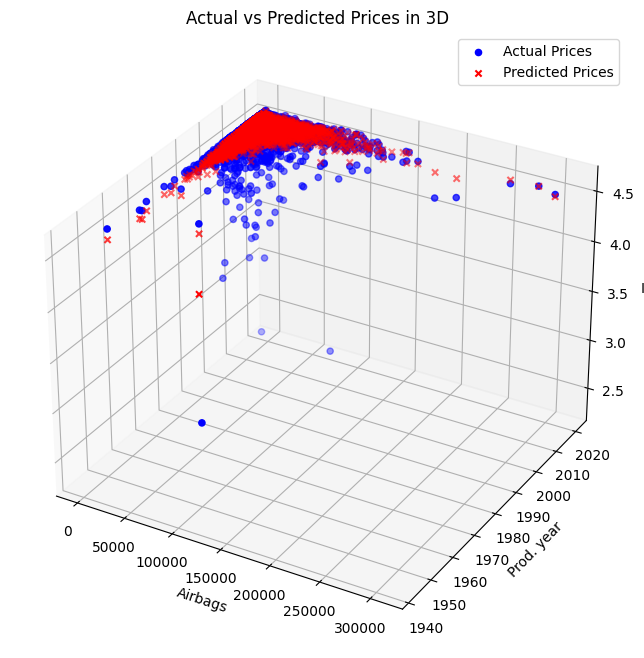

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='blue', marker='o', label='Actual Prices')


ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', marker='x', label='Predicted Prices')


ax.set_xlabel(X_columns[2])
ax.set_ylabel(X_columns[1])
ax.set_zlabel(y_column)

ax.legend()

plt.title("Actual vs Predicted Prices in 3D")
plt.show()

**Using R - Multiple linear Regression**

In [3]:
install.packages("scatterplot3d")

library(scatterplot3d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
dataset <- read.csv('car.csv')

In [5]:
X_columns <- c('Prod. year', 'Cylinders', 'Airbags', 'Engine volume', 'Mileage')
y_column <- 'Price'

In [6]:

if (exists("dataset")) {
  cat("Column names in dataset: ", names(dataset), "\n")
} else {
  cat("Dataset is not loaded properly.\n")
}


Column names in dataset:  ID Price Levy Manufacturer Model Prod..year Category Leather.interior Fuel.type Engine.volume Mileage Cylinders Gear.box.type Drive.wheels Doors Wheel Color Airbags 


In [7]:
set.seed(42)  # Set seed for reproducibility
sample_indices <- sample(1:nrow(dataset), 0.8 * nrow(dataset))
train_data <- dataset[sample_indices, ]
test_data <- dataset[-sample_indices, ]

In [8]:
model <- lm(Price ~Engine.volume+Cylinders, data = dataset)

In [9]:
y_pred <- predict(model, newdata = test_data)

Warning message in title(main, sub, ...):
“"add" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”


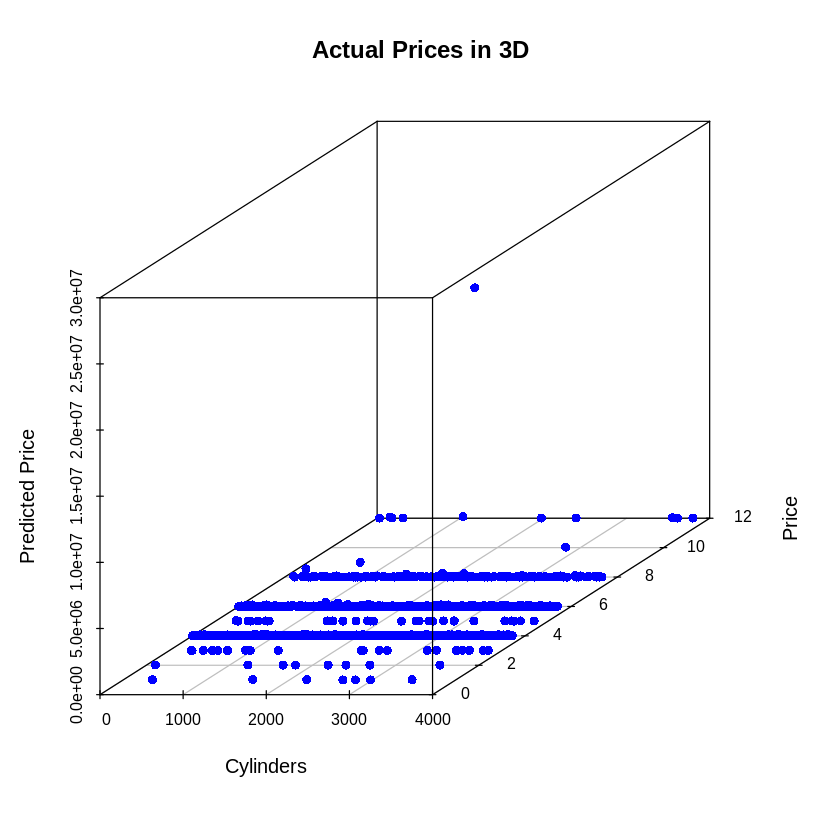

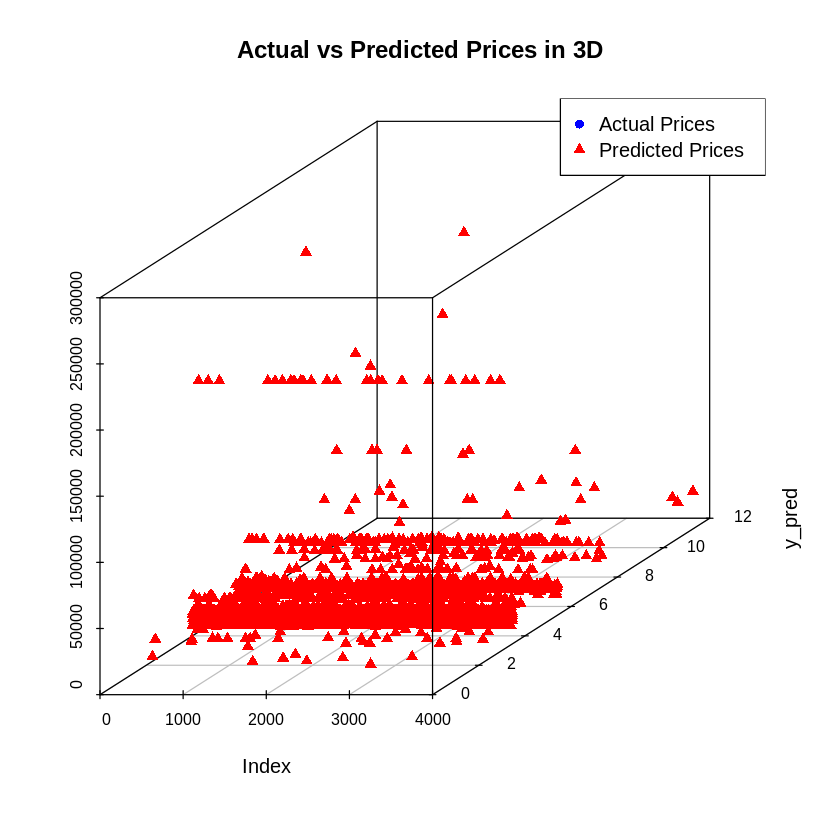

In [25]:

library(scatterplot3d)

scatterplot3d(test_data$Cylinders, test_data$Price, color = 'blue', pch = 16, main = "Actual Prices in 3D", xlab = "Cylinders", ylab = "Price", zlab = "Predicted Price")

scatterplot3d(test_data$Cylinders, y_pred, color = 'red', pch = 17, add = TRUE)

legend("topright", legend = c("Actual Prices", "Predicted Prices"), col = c('blue', 'red'), pch = c(16, 17))

title("Actual vs Predicted Prices in 3D")


In [26]:
intercept <- coef(model)[1]
coefficients <- coef(model)[-1]  # Exclude the intercept
r_squared <- summary(model)$r.squared

# Print the results
cat("Intercept:", intercept, "\n")
cat("Coefficients:", coefficients, "\n")
cat("R-squared:", r_squared, "\n")

Intercept: 18665.56 
Coefficients: -15271.8 -15674.09 -9854.872 -15258.87 -11736.87 -17493.65 145724.8 -17201.39 -14878.88 -11368.48 -11569.42 -11215.23 -10473 -11901.04 -12912.87 -9036.497 2408.727 -12865.62 -14401.87 -9689.033 -7632.002 -10117.88 -2452.267 -8583.747 -704.8901 -4120.355 -1319.126 -1600.159 4543.01 174776.4 -8211.607 -6510.192 -1163.022 -10967.6 -8164.163 718.7683 10153.32 21127.61 35937.24 12541.05 4258.627 4864.908 12599.3 -5057.211 1323.038 -880.0738 2560.791 -9062.917 -1491.696 -1392.566 -4903.67 2209.669 -9015.497 -976.95 -7972.872 -4258.976 32874.17 -8899.528 -4530.064 3575.458 -8658.505 -1019.099 -2542.417 24692.78 3508.244 29053.21 -2987.979 -8181.114 11289.8 -16151.53 10009.72 181158.4 270.2577 23723.14 -2503.433 -1400.41 41009.99 7005.231 24665.72 8447.234 41448.22 2534.551 50006.19 12060.86 14008.82 3627.804 48587.9 -4680.528 5159.067 -3850.983 836.817 10915.72 78358.61 -1201.183 -3671.222 242943.8 -7287.494 -2299.183 31770.89 -2839.691 4686.239 228259.4 -59